In [67]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [22]:
data = pd.read_csv("Data/features_3_sec.csv")
data.drop(columns=['filename'], inplace=True)

In [85]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [24]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca.fit(X)
X_pca = pca.transform(X)

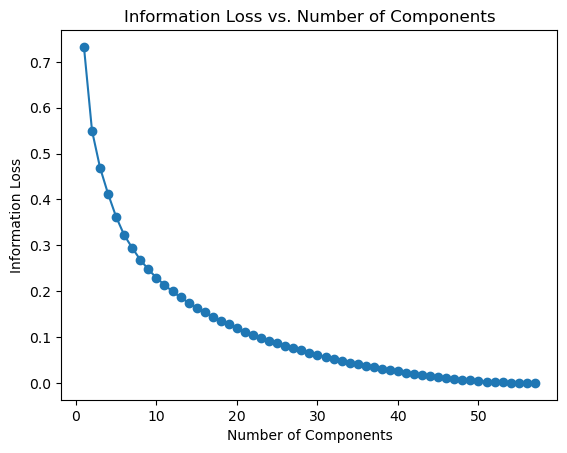

In [25]:
# Step 3: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Calculate information loss as 1 - cumulative explained variance
information_loss = 1 - cumulative_variance

# Step 5: Plot information loss
plt.plot(range(1, len(information_loss) + 1), information_loss, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Loss')
plt.title('Information Loss vs. Number of Components')
plt.show()

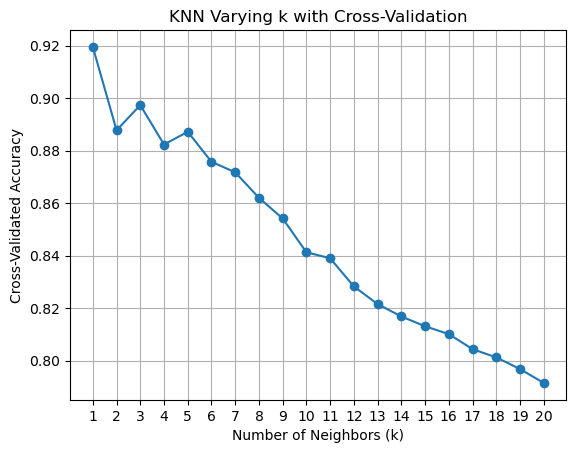

Best k based on 10 fold cross-validation: 1


In [46]:
# before PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Ensure arrays are contiguous in memory
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and calculate the mean score
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# Plot k values vs. cross-validated accuracy
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Varying k with Cross-Validation")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identify and print the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k based on 10 fold cross-validation: {best_k}")

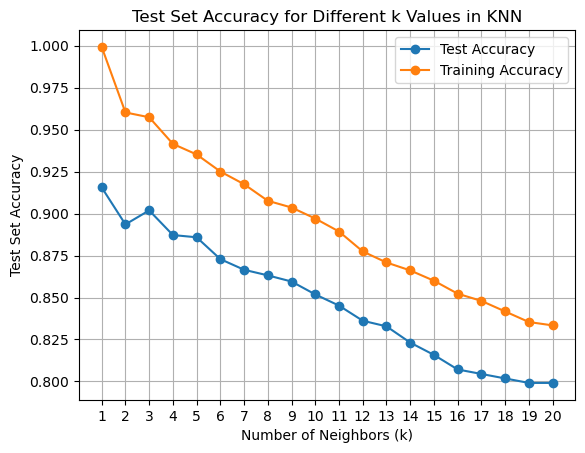

In [49]:
# Define the k values you want to test
best_k_values = range(1, 21)
test_accuracies = []
train_accuracies = []

# Loop over each k and calculate test accuracy
for k in best_k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    preds_train = knn.predict(X_train)
    accuracy = accuracy_score(y_test, preds)
    train_accuracies.append(accuracy_score(y_train, preds_train))
    test_accuracies.append(accuracy)

# Plot the test accuracy for each k value
plt.plot(best_k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.plot(best_k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Set Accuracy")
plt.title("Test Set Accuracy for Different k Values in KNN")
plt.legend(loc='best')
plt.xticks(best_k_values)
plt.grid(True)
plt.show()

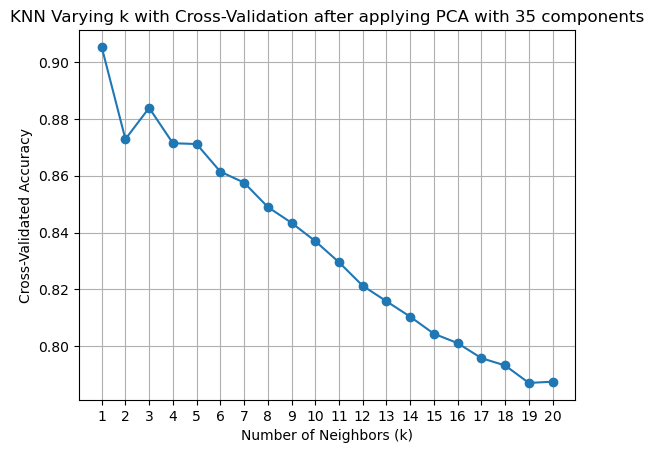

Best k based on 10 fold cross-validation: 1


In [59]:
# After applying pca
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
pca = PCA(n_components=35)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
# Ensure arrays are contiguous in memory
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold cross-validation and calculate the mean score
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# Plot k values vs. cross-validated accuracy
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Varying k with Cross-Validation after applying PCA with 35 components")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identify and print the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k based on 10 fold cross-validation: {best_k}")

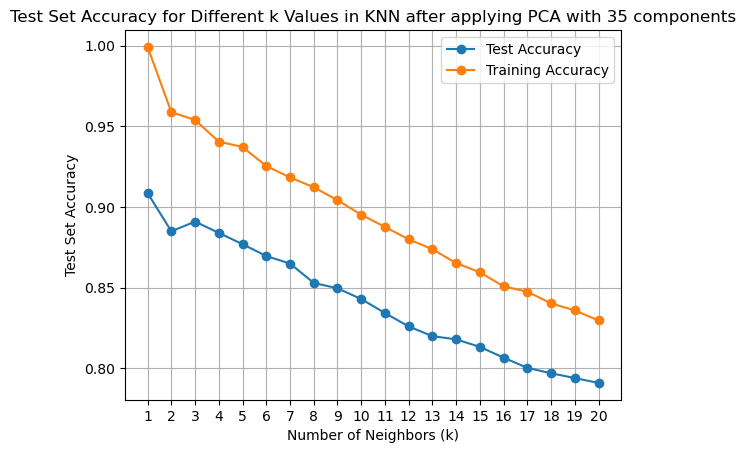

In [60]:
best_k_values = range(1, 21)
test_accuracies = []
train_accuracies = []

# Loop over each k and calculate test accuracy
for k in best_k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    preds_train = knn.predict(X_train)
    accuracy = accuracy_score(y_test, preds)
    train_accuracies.append(accuracy_score(y_train, preds_train))
    test_accuracies.append(accuracy)

# Plot the test accuracy for each k value
plt.plot(best_k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.plot(best_k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Set Accuracy")
plt.title("Test Set Accuracy for Different k Values in KNN after applying PCA with 35 components")
plt.legend(loc='best')
plt.xticks(best_k_values)
plt.grid(True)
plt.show()

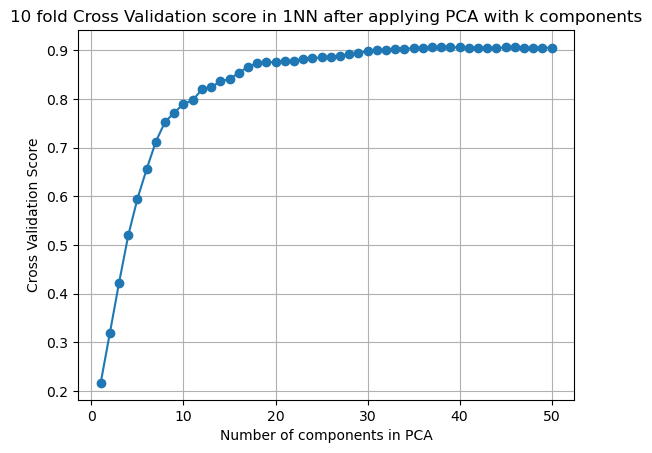

In [57]:
# pca component to use for 1 nn

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

pca_k = range(1, 51)
cv_scores =[]
for k in pca_k:
    pca = PCA(n_components=k)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    # Ensure arrays are contiguous in memory
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    # Perform 10-fold cross-validation and calculate the mean score
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(pca_k, cv_scores, marker='o')
plt.xlabel("Number of components in PCA")
plt.ylabel("Cross Validation Score")
plt.title("10 fold Cross Validation score in 1NN after applying PCA with k components")
plt.grid(True)
plt.show()

In [64]:
# final model 1: 1-nn with pca components of 30
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
pca = PCA(n_components=30)
pca.fit(X)
X_pca = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
# Ensure arrays are contiguous in memory
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
y_train = np.ascontiguousarray(y_train)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"accuracy: {acc}")

accuracy: 0.9049049049049049


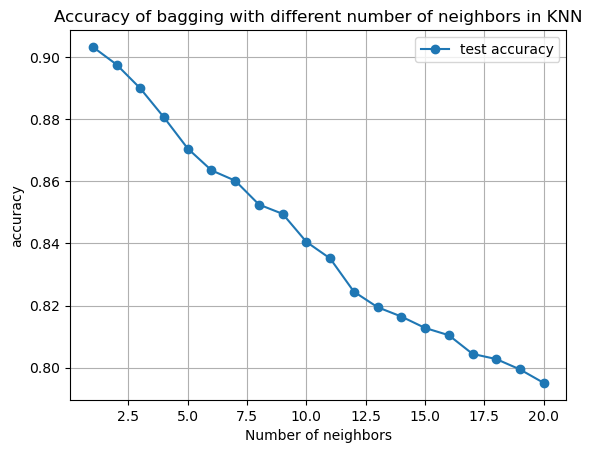

In [82]:
# bagging of knn
from sklearn.ensemble import BaggingClassifier
k_values = range(1, 21)
test_accuracies = []
train_accuracies = []
for k in k_values:
    base_estimator = KNeighborsClassifier(n_neighbors=k)
    bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=15, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    train_pred = bagging_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)
    train_accuracies.append(train_acc)
plt.plot(k_values, test_accuracies, marker='o', label='test accuracy')
plt.legend(loc='best')
plt.xlabel("Number of neighbors")
plt.ylabel("accuracy")
plt.title("Accuracy of bagging with different number of neighbors in KNN")
plt.grid(True)
plt.show()

In [83]:
# best k
# Find the index of the maximum accuracy
max_index = test_accuracies.index(max(test_accuracies))

# Use this index to get the corresponding k value
best_k = k_values[max_index]
best_accuracy = test_accuracies[max_index]

print(f"Best k: {best_k} with accuracy: {best_accuracy}")


Best k: 1 with accuracy: 0.9032365699032365
